# Question 3 - Loot Box Data Analysis

The first step is to import the necessary libraries for my analysis.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
%matplotlib inline

To look for correlations between the loot box strategy and increased player interest/expenditures, the spreadsheets will be loaded into DataFrames for analysis and visualization.

In [2]:
games = pd.read_csv('Dim_Game.csv')
platforms = pd.read_csv('Dim_Platform.csv')
data = pd.read_csv('Fact_Day.csv')

In [3]:
games.head(12)

,Game_ID,Game_Name,Theme,Co-operative_Play,Player_vs_Player,Achievements,Leaderboards,Release_Date
0,304,Asian Dynasty,Fantasy,1,1,0,1,'2017-01-04'
1,305,Hot Rod Demons,Cars,0,1,1,1,'2017-04-05'
2,306,Hot Date!,Romance,0,0,0,0,'2017-02-01'
3,307,Into the Depths II,Horror,0,0,1,1,'2017-03-01'
4,308,Crown of Thorns,Fantasy,1,0,1,0,'2017-05-03'
5,309,Prehistoric Deathmatch: Revenge of the Raptors,Survival,1,0,1,0,'2017-06-21'
6,310,Legends of the Samurai,Action/Adventure,1,1,1,0,'2017-09-06'
7,311,Battle Royale,Fighting,0,1,0,1,'2017-11-01'
8,312,Juni's Hair Studio,Slice of Life,0,0,1,0,'2017-08-02'
9,313,Kreepy Krawler,Comedy,0,0,1,1,'2017-10-04'


In [4]:
platforms.head()

,Platform_Key,Platform_Name,Provider,License_Date,Mobile,Console
0,1,iOS,Apple,'2013-03-15',1,0
1,2,Android,Google,'2011-08-02',1,0
2,3,Steam,Valve,'2012-02-28',0,0
3,4,Playstation 4,Sony,'2014-02-09',0,1


In [5]:
data.head()

,Platform_Key,Game_Key,Day,Game_Player_Seconds,Game_Player_Spend_Microtrans_cents,Game_Unique_Accounts,Total_Player_Seconds,Total_Player_Spend_Microtrans_cents,Total_Unique_Accounts
0,1,304,'2017-01-04',1498544.91,614050.18,3623,44986779.21,32322890.63,16806
1,2,304,'2017-01-04',976169.28,343607.89,3894,20194511.91,11852433.79,10503
2,4,304,'2017-01-04',301722.36,0.00,729,9057797.82,0.00,3384
3,3,304,'2017-01-04',894703.65,0.00,2163,26859277.53,0.00,10034
4,1,304,'2017-01-05',2635440.39,1242096.43,5666,46867490.76,34791368.00,17332


A quick inspection of each DataFrame reveals that the data is clean and does not contain any missing or null values. The analysis can now commence.

The DataFrames will be merged on their common columns so that all the data I need is in one DataFrame. First, the **Game_Key** column needs to be renamed **Game_ID** so that the **games** and **data** DataFrames can be joined.

In [6]:
data.rename(columns = {'Game_Key':'Game_ID'}, inplace = True)
df1 = pd.merge(games, data, how='left')
df2 = pd.merge(platforms, data, how='left')
df = pd.merge(df1, df2, how='left')

All games released after August 1, 2017 on the Android platform employ the new Loot Box strategy. Therefore, I will create a column **Has_Lootbox** to group these games for my analysis.

In [7]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])
df['Has_Lootbox'] = np.where((df['Release_Date'] > '2017-08-01') & (df['Platform_Name'] == 'Android'), 1, 0)

In [8]:
df.head(400)

,Game_ID,Game_Name,Theme,Co-operative_Play,Player_vs_Player,Achievements,Leaderboards,Release_Date,Platform_Key,Day,...,Game_Unique_Accounts,Total_Player_Seconds,Total_Player_Spend_Microtrans_cents,Total_Unique_Accounts,Platform_Name,Provider,License_Date,Mobile,Console,Has_Lootbox
0,304,Asian Dynasty,Fantasy,1,1,0,1,2017-01-04,1,'2017-01-04',...,3623,44986779.21,32322890.63,16806,iOS,Apple,'2013-03-15',1,0,0
1,304,Asian Dynasty,Fantasy,1,1,0,1,2017-01-04,2,'2017-01-04',...,3894,20194511.91,11852433.79,10503,Android,Google,'2011-08-02',1,0,0
2,304,Asian Dynasty,Fantasy,1,1,0,1,2017-01-04,4,'2017-01-04',...,729,9057797.82,0.00,3384,Playstation 4,Sony,'2014-02-09',0,1,0
3,304,Asian Dynasty,Fantasy,1,1,0,1,2017-01-04,3,'2017-01-04',...,2163,26859277.53,0.00,10034,Steam,Valve,'2012-02-28',0,0,0
4,304,Asian Dynasty,Fantasy,1,1,0,1,2017-01-04,1,'2017-01-05',...,5666,46867490.76,34791368.00,17332,iOS,Apple,'2013-03-15',1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,311,Battle Royale,Fighting,0,1,0,1,2017-11-01,3,'2017-11-01',...,2425,39158510.97,0.00,14036,Steam,Valve,'2012-02-28',0,0,0
396,311,Battle Royale,Fighting,0,1,0,1,2017-11-01,1,'2017-11-02',...,6446,60097632.21,41337698.57,22190,iOS,Apple,'2013-03-15',1,0,0
397,311,Battle Royale,Fighting,0,1,0,1,2017-11-01,2,'2017-11-02',...,7227,31149350.55,15840051.21,17571,Android,Google,'2011-08-02',1,0,1
398,311,Battle Royale,Fighting,0,1,0,1,2017-11-01,4,'2017-11-02',...,1222,11395848.57,0.00,4208,Playstation 4,Sony,'2014-02-09',0,1,0


Now that the data is aggregated by Loot Box in a single DataFrame, I will explore the data through visualizations.

The first plot shows the mean values for the **Game_Player_Spend_Microtrans_cents** column for games with and without Loot Boxes.

Text(0, 0.5, 'Average Cents Spent on Microtransactions')

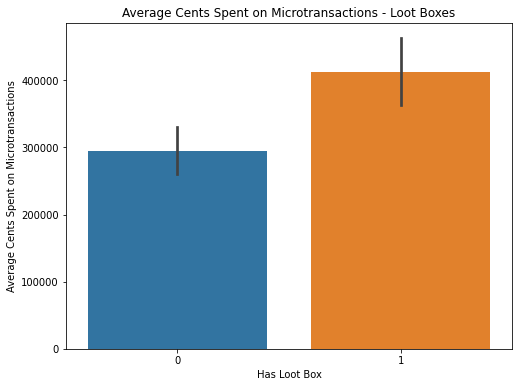

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(x=df.Has_Lootbox, y=df.Game_Player_Spend_Microtrans_cents)
plt.title('Average Cents Spent on Microtransactions - Loot Boxes')
plt.xlabel('Has Loot Box')
plt.ylabel('Average Cents Spent on Microtransactions')

At first glance, it appears that gamers are spending more on microtransactions in games that have Loot Boxes. However, when digging deeper into the data, the Steam and Playstation 4 platforms do not allow microtransactions. This results in skewed data as the 0 values for these platforms are averaged in.

It would be more useful to investigate whether players spent more on microtransactions with only the Android platform data. New DataFrames will be created to extract this data.

In [10]:
android_data = df.loc[df['Platform_Name'] == 'Android', :]
len(android_data)

168

There are 168 total rows for the Android platform subset of data. Next, two new DataFrames will be created to separate the games with Loot Boxes and without.

In [11]:
android_no_lootbox = android_data.loc[android_data['Has_Lootbox'] == 0, :]
len(android_no_lootbox)

98

In [12]:
android_lootbox = android_data.loc[android_data['Has_Lootbox'] == 1, :]
len(android_lootbox)

70

Although we are working with a smaller subset of data, the mean values will be more accurate now that the other platforms have been removed.

The second plot shows the mean values for the **Game_Player_Spend_Microtrans_cents** column for **Android** games with and without Loot Boxes.

Text(0, 0.5, 'Average Cents Spent on Microtransactions')

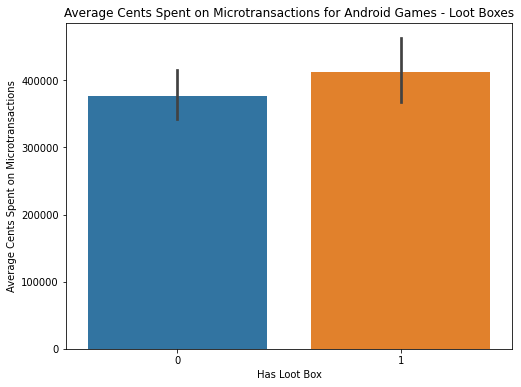

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x=android_data.Has_Lootbox, y=android_data.Game_Player_Spend_Microtrans_cents)
plt.title('Average Cents Spent on Microtransactions for Android Games - Loot Boxes')
plt.xlabel('Has Loot Box')
plt.ylabel('Average Cents Spent on Microtransactions')

Android gamers still appear to be spending more money on microtransactions in games with Loot Boxes. However, the difference is much less pronounced now that the 0 values have been eliminated and the error bars are within each other's range. 

One way to determine whether this data is statistically significant is to conduct a **Two-Sample T-Test**. These tests are useful for investigating an association between a binary categorical variable (**Has_Lootbox**) and a quantitative variable (**Game_Player_Spend_Microtrans_cents**). For typical analysis, a **p_value** of less than 0.05 is a statistically significant result.

In [14]:
tstat, pval = scipy.stats.ttest_ind(android_no_lootbox.Game_Player_Spend_Microtrans_cents, android_lootbox.Game_Player_Spend_Microtrans_cents)
print(pval)

0.21261647727587996


With a **p_value** greater than 0.05, this data does not appear to be statistically significant. Therefore, there is insufficient data to make a firm conclusion that Loot Boxes contribute towards more money spent on microtransactions for Android games.

The third plot shows the mean values for the **Game_Player_Seconds** column for **Android** games with and without Loot Boxes.

Text(0, 0.5, 'Average Seconds Spent Playing (millions)')

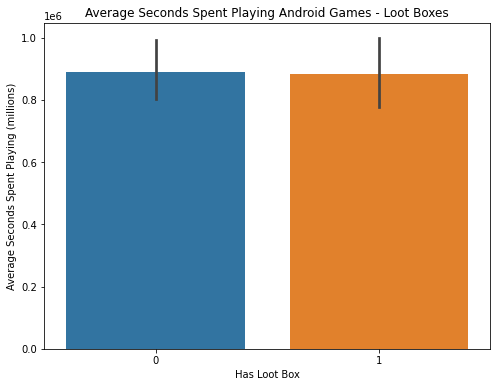

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x=android_data.Has_Lootbox, y=android_data.Game_Player_Seconds)
plt.title('Average Seconds Spent Playing Android Games - Loot Boxes')
plt.xlabel('Has Loot Box')
plt.ylabel('Average Seconds Spent Playing (millions)')

Loot Boxes appear to have little to no effect on the average amount of seconds gamers spend playing.

The final plot shows the mean values for the **Game_Unique_Accounts** column for Android games with and without Loot Boxes.

Text(0, 0.5, 'Average Number of Unique Accounts')

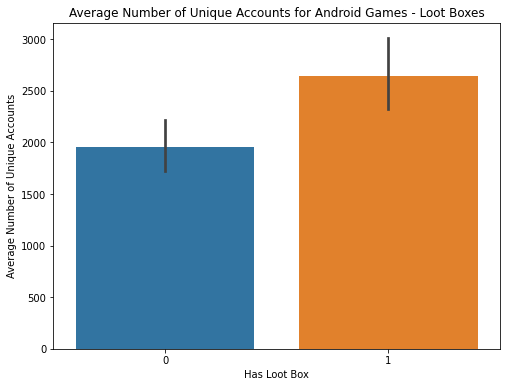

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x=android_data.Has_Lootbox, y=android_data.Game_Unique_Accounts)
plt.title('Average Number of Unique Accounts for Android Games - Loot Boxes')
plt.xlabel('Has Loot Box')
plt.ylabel('Average Number of Unique Accounts')

In [17]:
tstat, pval = scipy.stats.ttest_ind(android_no_lootbox.Game_Unique_Accounts, android_lootbox.Game_Unique_Accounts)
print(pval)

0.001119526640450398


There appears to be a higher average of unique player accounts in Android games with Loot Boxes and the result is statistically significant. This could indicate more interest from a broader audience of players. 

# Conclusions

* Loot Boxes have a small but statistically insignificant increase in money spent on in-game microtransactions. More data is necessary to conduct further analysis. For example, data on the costs of implementing Loot Boxes could provide a more convincing narrative on whether the new strategy is effective.

* Gamers are not spending more time playing Android games that contain Loot Boxes.

* There is a broader user base for Android games with Loot Boxes implemented. Over time, this could lead to a higher number of microtransactions and warrants further study.